In [43]:
#import all the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

In [44]:
#read all the needed files
root="/home/subhash/Desktop/spam/nnfl assignment/"
train_feature_matrix=pd.read_excel(os.path.join(root,'training_feature_matrix.xlsx'),header=None)
train_output=pd.read_excel(os.path.join(root,'training_output.xlsx'),header=None)
test_feature_matrix=pd.read_excel(os.path.join(root,'test_feature_matrix.xlsx'),header=None)
test_output=pd.read_excel(os.path.join(root,'test_output.xlsx'),header=None)
print(test_feature_matrix.shape)
print(train_feature_matrix.shape)
print(train_output.shape)
print(test_output.shape)

(104, 2)
(245, 2)
(245, 1)
(104, 1)


In [45]:
#Normalizing function
def normalize(vector):
    for i in range(0,vector.shape[1]):
        temp=vector.iloc[:,i].to_numpy()
        vector.iloc[:,i]=(temp-np.mean(temp))/np.std(temp)
    return vector

In [46]:
#Normalize all the datasets
x_train=normalize(train_feature_matrix)
x_test=normalize(test_feature_matrix)
y_train=normalize(train_output)
y_test=normalize(test_output)


In [47]:
#concatenating the feature matrix,i.e suitable for algorithm
train_padding=pd.DataFrame(np.ones(shape=train_output.shape))
test_padding=pd.DataFrame(np.ones(shape=test_output.shape))
x_train=pd.concat([train_padding,train_feature_matrix],axis=1)
x_test=pd.concat([test_padding,test_feature_matrix],axis=1)

In [48]:
#check the data u endup to
print(x_train)
print(y_train)
print(x_test)
print(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

       0         0         1
0    1.0  0.140090  0.137886
1    1.0  0.119183 -0.142367
2    1.0  0.091307 -0.586016
3    1.0  0.119183  0.027232
4    1.0  0.216749  1.051036
..   ...       ...       ...
240  1.0  0.108730 -0.865235
241  1.0  0.126152 -0.647030
242  1.0  0.206295  0.722178
243  1.0  0.171450 -0.224065
244  1.0  0.084338 -1.477449

[245 rows x 3 columns]
            0
0   -0.834236
1   -0.908720
2   -1.399072
3   -1.541833
4   -1.641144
..        ...
240 -0.021121
241 -0.076984
242 -1.560454
243 -1.535626
244 -1.467349

[245 rows x 1 columns]
       0         0         1
0    1.0  0.348400  1.071360
1    1.0  0.348400  0.954460
2    1.0  0.338739  0.498990
3    1.0  0.332299  0.167037
4    1.0  0.329079 -0.100952
..   ...       ...       ...
99   1.0  0.324249 -1.134306
100  1.0  0.324249 -1.049388
101  1.0  0.321029 -1.327302
102  1.0  0.321029 -1.240178
103  1.0  0.322639 -1.176214

[104 rows x 3 columns]
            0
0    1.117465
1    0.569968
2    0.661218
3    0.6

In [49]:
x_train = (x_train.to_numpy()).reshape((245,3))
y_train = (y_train.to_numpy()).reshape((245,1))
x_test = (x_test.to_numpy()).reshape((104,3))
y_test = (y_test.to_numpy()).reshape((104,1))

### Ridge regression with batch grdient descent

In [9]:
def hypothesis(w,x):
    hyps=[]
    for insts in range(0,x.shape[0]):
        hyp=np.dot(w.T,x[insts])
        hyps.append(hyp)
    return hyps

In [10]:
#loss function
def cost_func(y_cap,y,ridgf):
    errors=((y_cap-y)**2)/2
    return(errors+ridgf)

In [11]:
#Ridge regression cost factor
def ridge_factor(w,lamda):
    temp=0
    for i in range(0,len(w)):
        temp=temp+(w[i])**2
    return (lamda*temp)/2

In [12]:
def costavg(errors):
    costav=np.mean(errors)
    return(costav)


In [13]:
def dervcostf(hyps,y,x,w,lamda):
    derivatives=[]
    m=x.shape[0]
    for i in range(m):
        derivative=(np.dot(np.reshape(x[i],(1,3)).T,np.reshape(hyps[i]-y[i], (1,1))))
        derivative=derivative+(lamda*(w[0]+w[1]+w[2]))
        derivatives.append(derivative)
        deriv=np.array(derivatives)
        dW=np.squeeze(np.mean(deriv,axis=0,keepdims=True)/2)
        dW=np.reshape(dW,(x.shape[1],1))
    return (dW)

In [14]:
def updateparameters(w,derv,alpha):
    w=w-alpha*derv
    return w

In [24]:
def train(x_train,y_train,learn_rate,iters,lamda,x_test,y_test):
    alpha=learn_rate
    w_list=[]
    w = np.ones([3,1])
    train_losses=[]
    test_losses=[]
    for i in range(0,iters):
        w_list.append(w)
        errors=cost_func(hypothesis(w,x_train),y_train,ridge_factor(w,lamda))
        train_loss=costavg(errors)
        train_losses.append(train_loss)
        errors=cost_func(hypothesis(w,x_test),y_test,ridge_factor(w,lamda))
        test_loss=costavg(errors)
        test_losses.append(test_loss)
        derv=dervcostf(hypothesis(w,x_train),y_train,x_train,w,lamda)
        w=updateparameters(w,derv,learn_rate)
        if i%15==0:
            print("cost after epoch{} = {}".format(i,train_losses[-1]))
    print("cost after epoch{} = {}".format(i,train_losses[-1]))
    w_list=np.squeeze(np.array(w_list))
    
    costs=[]
    X = np.array(range(-50,50))/12
    Y = np.array(range(-50,50))/12
    for i in range(-50,50):
        cost=[]
        for j in range(-50,50):
            w=np.array([[0],[i/12],[j/12]])
            surf=costavg(cost_func(hypothesis(w,x_train),y_train,lamda))
            cost.append(surf)
        costs.append(cost)
    costs=np.array(costs)
    
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.suptitle('Learning Curves', fontsize=20)
    plt.xlabel('Number of Iterations', fontsize=14)
    plt.ylabel('Training loss',fontsize=14)
    plt.plot(range(0,iters),train_losses, label = 'Training Set Cost')
    plt.plot(range(0,iters),test_losses, label = 'Test Set Cost')
    plt.legend()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red') 
    ax.set_title('Minimization of train error',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red',marker='.') 
    ax.plot_wireframe(X, Y, costs/5, rstride=5, cstride=5)
    ax.set_title('3D Surf graph',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    return w_list[-1],train_losses,w_list,test_losses[-1]

cost after epoch0 = 1.9624643558474408
cost after epoch15 = 1.0077917060555013
cost after epoch30 = 0.6627542384451498
cost after epoch45 = 0.5370161161730715
cost after epoch60 = 0.490843181544928
cost after epoch75 = 0.47380298010593186
cost after epoch90 = 0.46752323458363293
cost after epoch105 = 0.46524365639422793
cost after epoch120 = 0.46445232793891483
cost after epoch135 = 0.46420862384676703
cost after epoch149 = 0.4641598405335548


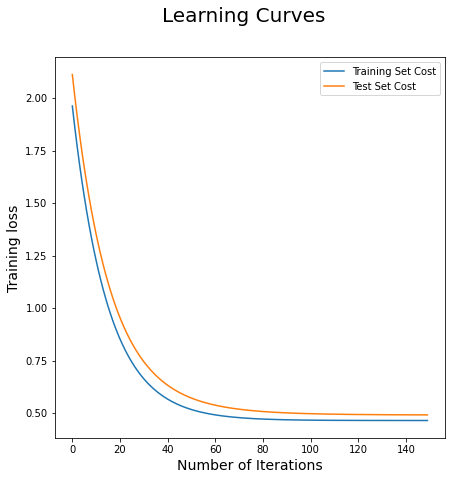

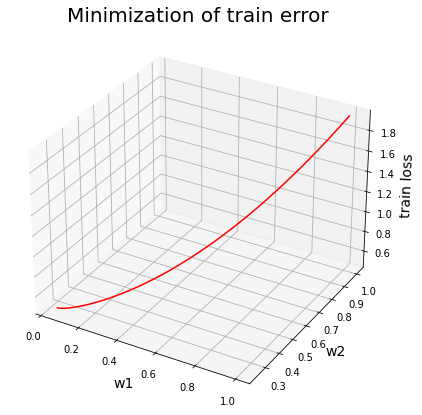

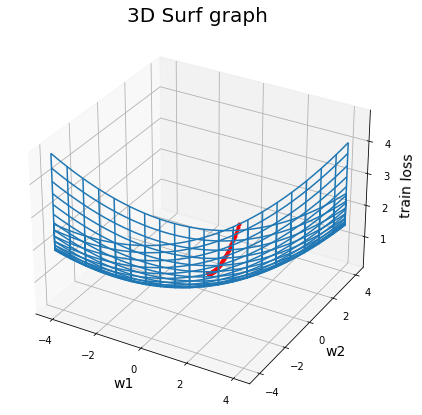

In [25]:
w,train_losses,w_list,mse=train(x_train,y_train,0.05,150,0.05,x_test,y_test)

In [26]:
print(w)
print(mse)

[0.00271364 0.04238788 0.24436085]
0.49086609295791056


### Ridge regression with stochastic gradient descent

In [50]:
def hypothesis(w,x):
    hyps=np.dot(w.T,x)
    return hyps

In [51]:
#Ridge regression cost factor
def ridge_factor(w,lamda):
    temp=0
    for i in range(0,len(w)):
        temp=temp+(w[i])**2
    return (lamda*temp)/2

In [52]:
#loss function
def cost_func(y_cap,y,ridgf):
        errors=((y_cap-y)**2)/2
        return(errors+ridgf)

In [56]:
def dervcostf(hyps,y,x,w,lamda):
    deriv=np.dot(np.reshape(x,(1,3)).T,np.reshape((hyps-y),(1,1)))+(lamda*(w[0]+w[1]+w[2]))
    return deriv

In [54]:
def update_parameters(w,deriv,alpha):
    w=w-(alpha*deriv)
    return w

In [61]:
def train(x_train,y_train,alpha,iters,lamda,x_test,y_test):
    w_list=[]
    w = np.ones([3,1])
    test_losses=[]
    test_losses_avg=[]
    train_losses_avg=[]
    for i in range(0,iters):
        for insts in range(0,x_train.shape[0]):
            train_losses=[]
            w_list.append(w)
            deriv=dervcostf(hypothesis(w,x_train[insts]),y_train[insts],x_train[insts],w,lamda)
            w=update_parameters(w,deriv,alpha)
            for insts in range(0,x_train.shape[0]):
                train_loss=cost_func(hypothesis(w,x_train[insts]),y_train[insts],ridge_factor(w,lamda))
                train_losses.append(train_loss)
            train_losses_avg.append(np.mean(np.array(train_losses)))
            for insts in range(0,x_test.shape[0]):
                test_loss=cost_func(hypothesis(w,x_test[insts]),y_test[insts],ridge_factor(w,lamda))
                test_losses.append(test_loss)
            test_losses_avg.append(np.mean(np.array(test_losses)))
        print("cost after epoch {}={}".format(i,train_losses_avg[-1]))
    w_list=np.squeeze(np.array(w_list))
    
    costs=[]
    def inddot(w,x):
        hyps=[]
        for insts in range(0,x.shape[0]):
            hyp=np.dot(w.T,x[insts])
            hyps.append(hyp)
        return hyps
    X = np.array(range(-50,50))/12
    Y = np.array(range(-50,50))/12
    for i in range(-50,50):
        cost=[]
        for j in range(-50,50):
            w=np.array([[0],[i/12],[j/12]])
            surf=np.mean(cost_func(inddot(w,x_train),y_train,lamda))
            cost.append(surf)
        costs.append(cost)
    costs=np.array(costs)
    
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.suptitle('Learning Curves', fontsize=20)
    plt.xlabel('Number of Iterations', fontsize=14)
    plt.ylabel('Training loss',fontsize=14)
    plt.plot(range(0,len(train_losses_avg)),train_losses_avg, label = 'Training Set Cost')
    plt.plot(range(0,len(test_losses_avg)),test_losses_avg, label = 'Test Set Cost')
    plt.legend()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses_avg
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red') 
    ax.set_title('Minimization of train error',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses_avg
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red',marker='.') 
    ax.plot_wireframe(X, Y, costs/5, rstride=5, cstride=5)
    ax.set_title('3D Surf graph',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    return(w_list[-1],train_losses_avg,w_list,test_losses_avg[-1])

cost after epoch 0=0.5061918013414485
cost after epoch 1=0.4646973522073942


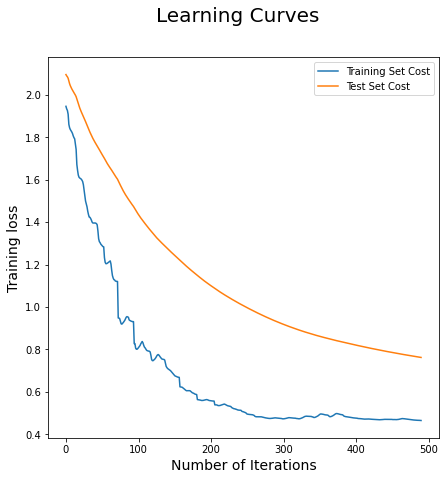

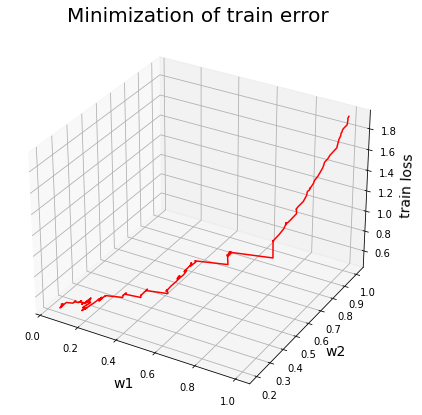

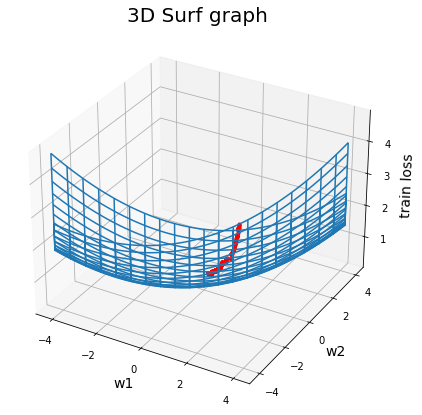

In [62]:
w,train_losses,w_list,mse=train(x_train,y_train,0.005,2,0.05,x_test,y_test)

In [63]:
print(w)
print(mse)

[0.03794139 0.04671486 0.2341091 ]
0.7619306464924746


### Ridge regression with mini batch gradient descent


In [ ]:
def hypothesis(w,x):
    hyps=np.dot(w.T,x)
    return hyps

In [ ]:
#loss function
def cost_func(y_cap,y,ridgf):
        errors=((y_cap-y)**2)/2
        return(errors+ridgf)

In [ ]:
#Ridge regression cost factor
def ridge_factor(w,lamda):
    temp=0
    for i in range(0,len(w)):
        temp=temp+(w[i])**2
    return (lamda*temp)/2def costavg(errors):
    costav=np.mean(errors)
    return(costav)

In [ ]:
def dervcostf(hyps,y,x,w,lamda):
    deriv=np.dot(np.reshape(x,(1,3)).T,np.reshape((hyps-y),(1,1)))+(lamda*(w[0]+w[1]+w[2]))
    return deriv

In [ ]:
def update_parameters(w,deriv,alpha):
    w=w-(alpha*deriv)
    return w

In [68]:
def train(x_train,y_train,alpha,iters,mini_batch_size,lamda,x_test,y_test):
    w_list=[]
    w = np.ones([3,1])
    test_losses=[]
    test_losses_avg=[]
    train_losses_avg=[]
    count=0
    for i in range(0,iters):
        for insts in range(0,x_train.shape[0]):
            train_losses=[]
            deriv=dervcostf(hypothesis(w,x_train[insts]),y_train[insts],x_train[insts],w,lamda)
            w=update_parameters(w,deriv,alpha)
            count=count+1
            if count==mini_batch_size:
                w_list.append(w)
                for insts in range(0,x_train.shape[0]):
                    train_loss=cost_func(hypothesis(w,x_train[insts]),y_train[insts],ridge_factor(w,lamda))
                    train_losses.append(train_loss)
                train_losses_avg.append(np.mean(np.array(train_losses)))
                for insts in range(0,x_test.shape[0]):
                    test_loss=cost_func(hypothesis(w,x_test[insts]),y_test[insts],ridge_factor(w,lamda))
                    test_losses.append(test_loss)
                test_losses_avg.append(np.mean(np.array(test_losses)))
                count=0
        print("cost after epoch {}={}".format(i,train_losses_avg[-1]))
    w_list=np.squeeze(np.array(w_list))
    
    costs=[]
    def inddot(w,x):
        hyps=[]
        for insts in range(0,x.shape[0]):
            hyp=np.dot(w.T,x[insts])
            hyps.append(hyp)
        return hyps
    X = np.array(range(-50,50))/12
    Y = np.array(range(-50,50))/12
    for i in range(-50,50):
        cost=[]
        for j in range(-50,50):
            w=np.array([[0],[i/12],[j/12]])
            surf=np.mean(cost_func(inddot(w,x_train),y_train,lamda))
            cost.append(surf)
        costs.append(cost)
    costs=np.array(costs)
    
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.suptitle('Learning Curves', fontsize=20)
    plt.xlabel('Number of Iterations', fontsize=14)
    plt.ylabel('Training loss',fontsize=14)
    plt.plot(range(0,len(train_losses_avg)),train_losses_avg, label = 'Training Set Cost')
    plt.plot(range(0,len(test_losses_avg)),test_losses_avg, label = 'Test Set Cost')
    plt.legend()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses_avg
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red') 
    ax.set_title('Minimization of train error',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    ax = plt.axes(projection ='3d')
    z = train_losses_avg
    x =w_list[:,1] 
    y =w_list[:,2]
    ax.plot3D(x, y, z, color='red',marker='.') 
    ax.plot_wireframe(X, Y, costs/5, rstride=5, cstride=5)
    ax.set_title('3D Surf graph',fontsize=20) 
    ax.set_xlabel('w1',fontsize=14)
    ax.set_ylabel('w2',fontsize=14)
    ax.set_zlabel('train loss',fontsize=14)
    plt.show()
    return(w_list[-1],train_losses_avg,w_list,test_losses_avg[-1])

cost after epoch 0=1.2392578445969435
cost after epoch 1=0.8662611940760137
cost after epoch 2=0.6732416118663546
cost after epoch 3=0.5730246313196758
cost after epoch 4=0.5208316181122852
cost after epoch 5=0.49358280894456474
cost after epoch 6=0.479338261311611
cost after epoch 7=0.47189658932781303
cost after epoch 8=0.4680237143468688
cost after epoch 9=0.46602617430053445


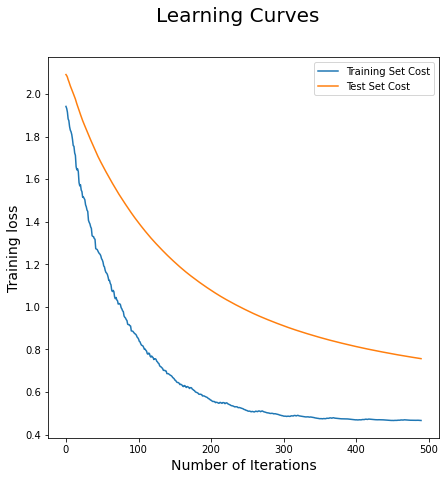

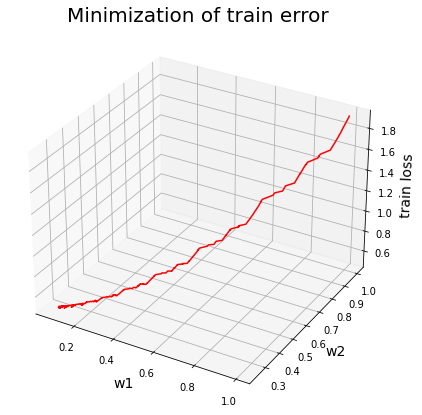

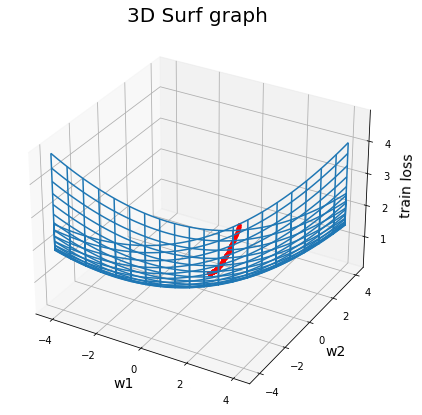

In [70]:
w,train_losses,w_list,mse=train(x_train,y_train,0.001,10,5,0.05,x_test,y_test)

In [71]:
print(w)
print(mse)

[0.05224061 0.07028494 0.25414773]
0.7565037231826027
